In [11]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=10):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [2]:
from fastdownload import download_url

urls = search_images('bird photos', max_images=1)
print(urls[0])

dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=True)

!ls

Searching for 'bird photos'
http://hdqwalls.com/download/1/colorful-parrot-bird.jpg


bird.ipynb  bird.jpg  lecture


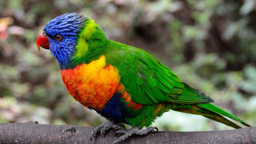

In [3]:
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [4]:
urls = search_images('forest photos', max_images=1)
print(urls[0])

dest = 'forest.jpg'
download_url(urls[0], dest)

!ls

Searching for 'forest photos'
http://images.huffingtonpost.com/2016-04-01-1459522223-1796976-Forests_3.jpeg


bird.ipynb  bird.jpg  forest.jpg  lecture


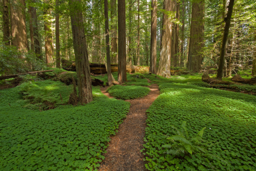

In [5]:
im = Image.open(dest)
im.to_thumb(256, 256)

In [17]:
searches = 'forest','bird'

path = Path('bird_or_not')

from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo')) 
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


In [14]:
r = search_images('forest photo')
print('\n'.join(r))

Searching for 'forest photo'
https://wallpapercave.com/wp/wp4452517.jpg
http://images.huffingtonpost.com/2016-04-01-1459522223-1796976-Forests_3.jpeg
https://www.goodfreephotos.com/albums/new-zealand/other-new-zealand/magical-forest-scene-in-new-zealand.jpg
http://wallup.net/wp-content/uploads/2017/03/28/379664-river-forest.jpg
https://picjumbo.com/wp-content/uploads/forest-path-in-fall-season-1570x1047.jpg
http://wallpapercave.com/wp/wp1853040.jpg
https://d2joqs9jfh6k92.cloudfront.net/wp-content/uploads/2021/01/20131809/lukasz-szmigiel-jFCViYFYcus-unsplash-2048x1364.jpg
https://cdn6.dissolve.com/p/D869_7_014/D869_7_014_1200.jpg
https://c.pxhere.com/photos/0d/4a/canopy_countryside_backroad_tree_nature-500326.jpg!d
https://images.unsplash.com/photo-1492486169476-8c5dafd9539f?ixlib=rb-0.3.5&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max&s=a138fe7946d6f028d3ae31e8bbb35176


In [18]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

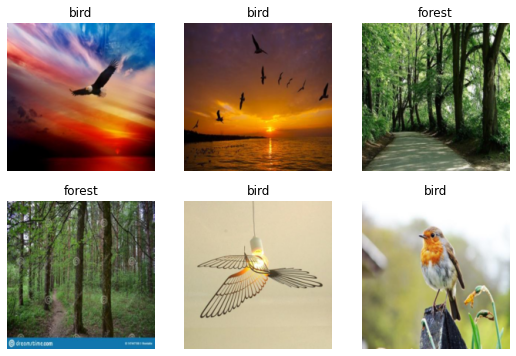

In [23]:
# load data from bird_or_not

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [21]:
!pwd
get_image_files('.') # get all path to image in the given path

/home/mt/deep-for-coder/lesson_01


(#55) [Path('bird.jpg'),Path('forest.jpg'),Path('bird_or_not/bird/4a6af26d-7c0d-4fe8-b55c-aa34e2122a35.jpg'),Path('bird_or_not/bird/4263f3f9-e61a-480d-a540-caf8d41243b0.jpg'),Path('bird_or_not/bird/784649b5-dcd7-41f2-b9d2-9991ca32e44c.jpg'),Path('bird_or_not/bird/792d11df-62db-4383-9f0c-85d4aafb4289.jpg'),Path('bird_or_not/bird/306e313f-af03-473e-aaa0-e47f4bd56a61.jpg'),Path('bird_or_not/bird/c738a252-73ca-42d9-8d04-ca22df1350f9.jpg'),Path('bird_or_not/bird/3b9efd81-a667-4c9c-b87e-bac8ce9a4570.jpg'),Path('bird_or_not/bird/07449679-adf2-48b7-a7c5-9dffa8e0cee7.jpg')...]

In [22]:
parent_label('bird_or_not/bird/784649b5-dcd7-41f2-b9d2-9991ca32e44c.jpg')

'bird'

In [34]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.208598,0.782733,0.200000,00:04


epoch,train_loss,valid_loss,error_rate,time
0,1.112749,0.650432,0.100000,00:06
1,0.828317,0.495479,0.100000,00:07
2,0.608411,0.318846,0.100000,00:07
3,0.526345,0.215964,0.100000,00:07
4,0.426386,0.137383,0.100000,00:06
5,0.359162,0.085479,0.100000,00:06
6,0.306213,0.065745,0.000000,00:06
7,0.265478,0.042448,0.000000,00:06
8,0.234822,0.027633,0.000000,00:06
9,0.209461,0.025068,0.000000,00:06


In [35]:
is_bird,x,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(x)
print(f"probility: {probs}")

This is a: bird.
TensorBase(0)
probility: TensorBase([0.9977, 0.0023])
